In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


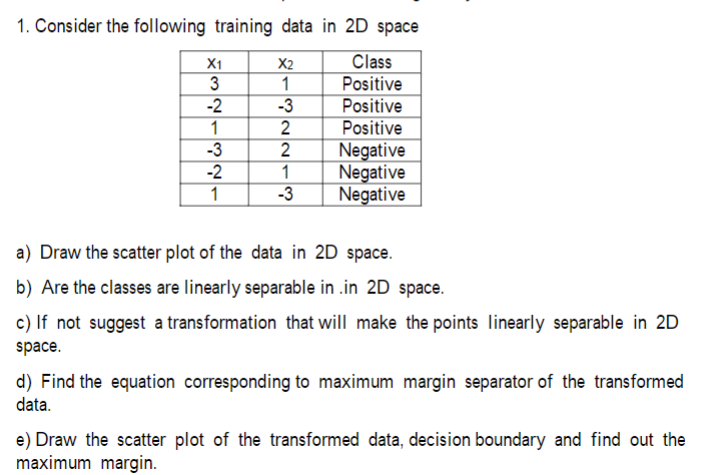

# Part - A
 * Step 1: Creating the dataframe and Performing the scatter plot in 2D space

In [27]:
# initialize list of lists
data = [[3, 1, 'Positive'], [-2,-3,'Positive'], [1,2,'Positive'],[-3,2,'Negative'],[-2,1,'Negative'],[1,-3,'Negative']]
# Create the pandas DataFrame
df = pd.DataFrame(data, columns=['X1', 'X2','Classes'])
 
# print dataframe.
df

,X1,X2,Classes
0,3,1,Positive
1,-2,-3,Positive
2,1,2,Positive
3,-3,2,Negative
4,-2,1,Negative
5,1,-3,Negative


* Step-2 Draw the scatterplot ofthe  data  in  2D  space.

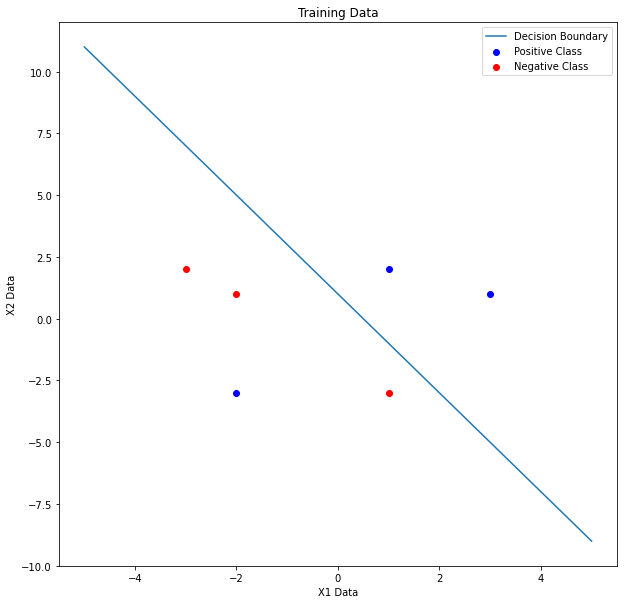

In [28]:
plt.rcParams['figure.figsize'] = [10, 10]                                                    #decalring figure size
plt.scatter(df['X1'].iloc[0:3,], df['X2'].iloc[0:3,], color = 'blue',label='Positive Class')   #scatter plotting postive class
plt.scatter(df['X1'].iloc[3:6,], df['X2'].iloc[3:6,], color = 'red',label='Negative Class')    #scatter plotting negative class
plt.title('Training Data')                                                                     #providing titles
plt.xlabel('X1 Data')                                                                               #providing xlabel
plt.ylabel('X2 Data')                                                                               #providing ylabel
plt.legend()                                                                                   #providing legends
x = np.linspace(-5,5,100)
plt.plot(x,-2*x+1,label="Decision Boundary")
plt.legend()
plt.show()
                                                                                  #showing plot

# Part-A 

* No the data is not linearly seperable in 2D space.

# Part-C

* Step-1 : Transforming the data, by convert all negative points to positive if the x and y values are less than zero and positive class and converting x value as negative if the x value is greater than zero and y value is less than zero when class is negative

In [29]:
X_new=[]                             #creating new list
Y_new=[]                             #creating new list

In [30]:
def transform(x,y,Classes):                       #defining function for plotting 
    X_new=0                                       #defining xnew as zero
    Y_new=0                                       #defining ynew as zero
    if x <0 and y<0 and Classes=='Positive':      #if condition for checking if x and y is less than zero and class is positive
        X_new=-1*x                                #if condition is true, convert x to -ve point
        Y_new=-1*y                                #if condition is true,convert y to -ve point
    elif x >0 and y<0 and Classes=='Negative':      #if condition for checking if x and y is less than zero and class is positive
        X_new=-1*x                                #if condition is true, convert x to -ve point
        Y_new=y                                #if condition is true,convert y to -ve point
    else:                                         #else condition
        X_new=x                                   #keep x_new as x
        Y_new=y                                   #keep y_new as y
    return X_new,Y_new                            #return x_new and y_new

In [31]:
for i in range(len(df['X1'])):                                   #for loop counter
    a,b = transform(df['X1'][i],df['X2'][i],df['Classes'][i])    #calling the function
    X_new.append(a)                                              #appending to empty list
    Y_new.append(b)                                              #appending to emoty list

In [32]:
X_new                                                            #printing x_new

[3, 2, 1, -3, -2, -1]

In [33]:
Y_new                                                            #printing y_new

[1, 3, 2, 2, 1, -3]

* Step - 2 Manually plotting the transformed points in the scatter plot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


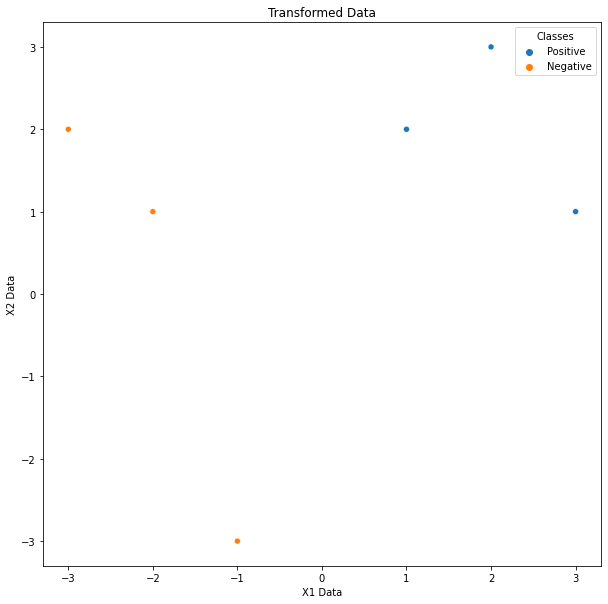

In [34]:
sns.scatterplot(X_new,Y_new,hue = df['Classes'])                 #scatter plotting with transformed data
plt.title('Transformed Data')                                    #providing titles
plt.xlabel('X1 Data')                                            #providing xlabel
plt.ylabel('X2 Data')                                            #providing ylabel
plt.show()                                                       #providing legends


In [35]:
from scipy.stats import linregress
linregress(X_new, Y_new)


LinregressResult(slope=0.2142857142857143, intercept=1.0, rvalue=0.2417468892076141, pvalue=0.6444436986654247, stderr=0.43005694924258203, intercept_stderr=0.9290291911965082)

# Part D

 * The Equation for the maximum line seprator is y=mx+c.<br>
 * The Slope of the line is 0.2142857142857143.<br>
 * The Intercept of the line is 1.0.<br>

# Part E

* Finding the equation corresponding to maximum margin separator of the transformed data in 2D space.

* From the below plot we can see that nearest points to the decision boundary are [-2,1] (Negative Class) and [1,2] (Positive Class)

* Equation for maximum margin seperator is average between these two values. The maximum margin seperator is [-0.5,1.5]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


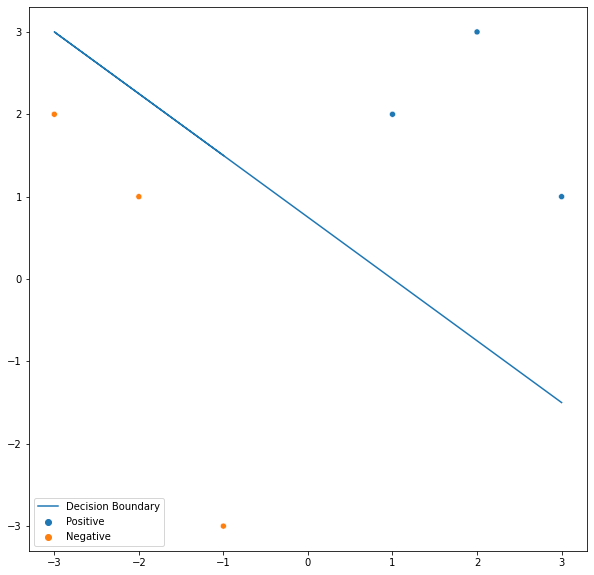

In [36]:
a, b = np.polyfit([3,1], [1,2], 1)                                  #performing the polyfit on near by support vector
c, d = np.polyfit([-3,-2], [2,1], 1)                                #performing the polyfit on far away support vector
X_new=np.array(X_new)                                               #converting x_new to np arrya
A=(a+c)/2                                                           #calculating midpoint of a and c polyfit point
B=(b+d)/2                                                           #calculating midpoint of b and c polyfit point
sns.scatterplot(X_new,Y_new,hue = df['Classes'])                    #creating the scatter plot
plt.plot(X_new, A*X_new+B,label="Decision Boundary")                #plotting x_new and mid points
plt.legend()